## 데이터 전처리

### 수치형
사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수

### 범주형
주야, 요일, 발생지시도, 발생지시군구, 
사고유형_대분류, 사고유형_중분류, 법규위반, 도로형태_대분류,
도로형태, 당사자종별_1당_대분류, 당사자종별_2당_대분류

In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, MultiLabelBinarizer

In [62]:
categorical = ['주야', '요일', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '법규위반', 
            '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_2당_대분류']

numerical = ['사상자수', '사망자수', '중상자수', '경상자수','부상신고자수']

x_train_num = pd.read_csv('./samsung_dataset/dataset_kor/교통사망사고정보/Kor_Train_교통사망사고정보(12.1~17.6).csv',encoding='cp949', 
                              usecols=numerical)

x_train_cat = pd.read_csv('./samsung_dataset/dataset_kor/교통사망사고정보/Kor_Train_교통사망사고정보(12.1~17.6).csv',encoding='cp949',
                               usecols=categorical)

In [63]:
x_test_num = pd.read_csv('./samsung_dataset/test_kor.csv',encoding='cp949', 
                              usecols=numerical)

x_test_cat = pd.read_csv('./samsung_dataset/test_kor.csv',encoding='cp949',
                               usecols=categorical)

In [98]:
# x_train_num.describe()
# x_train_cat.describe()
# x_test_num.describe()
# x_test_cat.describe()

### One Hot Encdoing을 전체 카테고리 종류에 적용

In [65]:
all_data = pd.concat((x_test_cat.dropna(),x_train_cat))
# for col in all_data.select_dtypes(include=[np.object]).columns:
#     print(col, all_data[col].unique())

In [66]:
for column in all_data.select_dtypes(include=[np.object]).columns:
    x_train_cat[column] = x_train_cat[column].astype('category', categories = all_data[column].unique())
    x_test_cat[column] = x_test_cat[column].astype('category', categories = all_data[column].unique())

C:\Users\Chuck\AppData\Local\conda\conda\envs\sdc2018\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
C:\Users\Chuck\AppData\Local\conda\conda\envs\sdc2018\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
x_train_cat = pd.get_dummies(data=x_train_cat)
x_test_cat = pd.get_dummies(data=x_test_cat)
# x_test_cat
print(x_train_cat.shape)
print(x_test_cat.shape)

(25037, 328)
(50, 328)


In [68]:
x_test_cat

,주야_야간,주야_주간,요일_금,요일_월,요일_일,요일_목,요일_수,요일_화,요일_토,발생지시도_경기,...,당사자종별_2당_대분류_특수차,당사자종별_2당_대분류_승용차,당사자종별_2당_대분류_이륜차,당사자종별_2당_대분류_농기계,당사자종별_2당_대분류_원동기장치자전거,당사자종별_2당_대분류_자전거,당사자종별_2당_대분류_사륜오토바이(ATV),당사자종별_2당_대분류_건설기계,당사자종별_2당_대분류_불명,당사자종별_2당_대분류_열차
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Deep Learning

In [69]:
import keras
from keras.layers import Dense, Input, LSTM, concatenate, Dropout, Conv2D, MaxPool2D, Embedding, Reshape
from keras.models import Sequential, Model
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras import metrics

In [70]:
print(x_train_cat.shape)
print(x_train_num.shape)
print(x_test_cat.shape)
print(x_test_num.shape)

(25037, 328)
(25037, 5)
(50, 328)
(50, 5)


In [71]:
Case1 = ['사망자수','사상자수','경상자수']
Case2 = ['사상자수', '중상자수', '부상신고자수']

### Case 1
'사망자수', '경상자수' 예측

In [87]:
# 아래 코드는 함수화(case input 예외처리, 모델구성, 학습과정 설정, 학습, 평가)

# test case는 전체(15~)만들고 배열로 받아서 반복문 돌림



In [72]:
# train 데이터 중 사망자수, 경상자수 DataFrame
y_train_num = x_train_num[['사망자수','경상자수']]

# train 데이터 중 중상자 수, 부상신고자 수 DataFrame
x_train_num = x_train_num.drop(columns=['사망자수','사상자수','경상자수'])

In [73]:
# train 데이터 중 중상자 수, 부상신고자 수 column + 카테고리 columns
x_train = pd.concat([x_train_num, x_train_cat], axis=1).values

# DataFrame to ndarray
y_train = y_train_num.values

Test Data 생성

In [75]:
# test 데이터 중 사망자수, 경상자수 DataFrame
x_test = x_test_num.drop(columns=['사망자수','사상자수','경상자수'])

# all category columns(numeric + categoric)
all_categories = pd.concat([x_test, x_test_cat],axis=1)

# test 데이터 중 중상자 수, 부상신고자 수 column + 카테고리 columns
x_test = pd.concat([x_test, x_test_cat],axis=1).values

In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(25037, 330)
(25037, 2)
(50, 330)


In [77]:
num_input = Input(shape=(len(x_train[0]),), name='num_input')
x = Dense(512, activation='relu')(num_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
num_output = Dense(len(y_train[0]), name='num_output')(x)

In [78]:
model = Model(inputs=num_input, outputs=num_output)

In [79]:
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

In [80]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

In [81]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )

Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 2s 84us/step - loss: 0.7023 - acc: 0.9541 - val_loss: 0.6131 - val_acc: 0.9551
Epoch 2/50
20029/20029 [==============================] - 1s 49us/step - loss: 0.6311 - acc: 0.9526 - val_loss: 0.5900 - val_acc: 0.9403
Epoch 3/50
20029/20029 [==============================] - 1s 48us/step - loss: 0.6015 - acc: 0.9472 - val_loss: 0.5716 - val_acc: 0.9337
Epoch 4/50
20029/20029 [==============================] - 1s 48us/step - loss: 0.5959 - acc: 0.9453 - val_loss: 0.5645 - val_acc: 0.9289
Epoch 5/50
20029/20029 [==============================] - 1s 48us/step - loss: 0.6046 - acc: 0.9450 - val_loss: 0.5693 - val_acc: 0.9383
Epoch 6/50
20029/20029 [==============================] - 1s 51us/step - loss: 0.5976 - acc: 0.9452 - val_loss: 0.5900 - val_acc: 0.9455
Epoch 7/50
20029/20029 [==============================] - 1s 49us/step - loss: 0.6054 - acc: 0.9503 - val_loss: 0.5635 - val_acc:

In [85]:
# show all categories(numeric + categorical)
all_categories

,중상자수,부상신고자수,주야_야간,주야_주간,요일_금,요일_월,요일_일,요일_목,요일_수,요일_화,...,당사자종별_2당_대분류_특수차,당사자종별_2당_대분류_승용차,당사자종별_2당_대분류_이륜차,당사자종별_2당_대분류_농기계,당사자종별_2당_대분류_원동기장치자전거,당사자종별_2당_대분류_자전거,당사자종별_2당_대분류_사륜오토바이(ATV),당사자종별_2당_대분류_건설기계,당사자종별_2당_대분류_불명,당사자종별_2당_대분류_열차
0,0.0,0.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,0.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,0.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,0.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,NaN,0.0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,NaN,4.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,NaN,0.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# make a prediction
y_test = model.predict(x_test[0:2])

# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (x_test[0:2], y_test))

X=[[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0

### Case 2

'사상자수', '중상자수', '부상신고자수' 예측

In [84]:
Y = x_train_num[['사상자수', '중상자수', '부상신고자수']].values
X = x_train_num.drop(columns=['사상자수', '중상자수', '부상신고자수'])

KeyError: "['사상자수'] not in index"

In [ ]:
X = X.reset_index(drop=True)
x_train_cat = x_train_cat.reset_index(drop=True)

In [ ]:
X = pd.concat([X, x_train_cat], axis=1).values

Test Data 생성

In [222]:
X_test = x_test_num.drop(columns=['사상자수', '중상자수', '부상신고자수'])
X_test = X_test.reset_index(drop=True)
x_test_cat = x_test_cat.reset_index(drop=True)
X_test = pd.concat([X_test, x_test_cat],axis=1).values

In [231]:
X_test

array([[nan, nan,  1., ...,  0.,  0.,  0.],
       [nan, nan,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 2.,  9.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [223]:
print(X.shape)
print(Y.shape)

(25037, 330)
(25037, 3)


In [242]:
num_input = Input(shape=(len(X[0]),), name='num_input')
x = Dense(512, activation='relu')(num_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
num_output = Dense(len(Y[0]), name='num_output')(x)

In [243]:
model = Model(inputs=num_input, outputs=num_output)

In [244]:
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

In [245]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

In [246]:
history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )

Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 1s 37us/step - loss: 1.1353 - acc: 0.9906 - val_loss: 1.3231 - val_acc: 1.0000
Epoch 2/50
20029/20029 [==============================] - 1s 27us/step - loss: 0.9941 - acc: 1.0000 - val_loss: 1.5311 - val_acc: 1.0000
Epoch 3/50
20029/20029 [==============================] - 1s 28us/step - loss: 0.8412 - acc: 1.0000 - val_loss: 1.2721 - val_acc: 1.0000
Epoch 4/50
20029/20029 [==============================] - 1s 28us/step - loss: 0.7906 - acc: 1.0000 - val_loss: 1.5489 - val_acc: 1.0000
Epoch 5/50
20029/20029 [==============================] - 1s 27us/step - loss: 0.8055 - acc: 1.0000 - val_loss: 1.2552 - val_acc: 1.0000
Epoch 6/50
20029/20029 [==============================] - 1s 27us/step - loss: 0.7961 - acc: 1.0000 - val_loss: 1.2185 - val_acc: 1.0000
Epoch 7/50
20029/20029 [==============================] - 1s 27us/step - loss: 0.8144 - acc: 1.0000 - val_loss: 1.1873 - val_acc:

In [247]:
# make a prediction
Y_test = model.predict(X_test[2:4])
# Y_test = model.predict(X[0:2])

# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[2:4],  Y_test ))

X=[[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0

### Case 3
'사상자수', '중상자수', '경상자수' 예측

In [34]:
Y = x_train_num[['사상자수', '중상자수', '경상자수']].values
X = x_train_num.drop(columns=['사상자수', '중상자수', '경상자수'])

In [35]:
X = pd.concat([X, x_train_cat], axis=1).values

Test Data 생성

In [36]:
X_test = x_test_num.drop(columns=['사상자수', '중상자수', '경상자수'])
X_test = pd.concat([X_test, x_test_cat],axis=1).values

In [37]:
print(X.shape)
print(Y.shape)

(25037, 330)
(25037, 3)


In [38]:
num_input = Input(shape=(len(X[0]),), name='num_input')
x = Dense(512, activation='relu')(num_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
num_output = Dense(len(Y[0]), name='num_output')(x)

In [39]:
model = Model(inputs=num_input, outputs=num_output)

In [40]:
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

In [41]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

In [42]:
history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )

Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 1s 36us/step - loss: 2.1094 - acc: 0.9922 - val_loss: 2.1658 - val_acc: 1.0000
Epoch 2/50
20029/20029 [==============================] - 1s 28us/step - loss: 1.8946 - acc: 1.0000 - val_loss: 1.8385 - val_acc: 1.0000
Epoch 3/50
20029/20029 [==============================] - 1s 27us/step - loss: 1.8123 - acc: 1.0000 - val_loss: 1.8323 - val_acc: 1.0000
Epoch 4/50
20029/20029 [==============================] - 1s 27us/step - loss: 1.7215 - acc: 1.0000 - val_loss: 1.7207 - val_acc: 1.0000
Epoch 5/50
20029/20029 [==============================] - 1s 27us/step - loss: 1.6523 - acc: 1.0000 - val_loss: 1.7731 - val_acc: 1.0000
Epoch 6/50
20029/20029 [==============================] - 1s 27us/step - loss: 1.6442 - acc: 1.0000 - val_loss: 1.5930 - val_acc: 1.0000
Epoch 7/50
20029/20029 [==============================] - 1s 30us/step - loss: 1.5781 - acc: 1.0000 - val_loss: 1.6481 - val_acc:

In [43]:
# make a prediction
Y_test = model.predict(X_test[4:7])

# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[4:7],  Y_test ))

X=[[1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0

### Case 4
'사망자수', '사상자수', '중상자수' 예측

In [67]:
Y = x_train_num[['사망자수', '중상자수']].values
X = x_train_num.drop(columns=['사망자수', '사상자수', '중상자수'])

In [68]:
X = pd.concat([X, x_train_cat], axis=1).values

Test Data 생성

In [77]:
X_test = x_test_num.drop(columns=['사망자수', '사상자수', '중상자수'])
X_test = pd.concat([X_test, x_test_cat],axis=1).values

In [70]:
print(X.shape)
print(Y.shape)

(25037, 330)
(25037, 2)


In [71]:
num_input = Input(shape=(len(X[0]),), name='num_input')
x = Dense(512, activation='relu')(num_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
num_output = Dense(len(Y[0]), name='num_output')(x)

In [72]:
model = Model(inputs=num_input, outputs=num_output)

In [73]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [74]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

In [75]:
history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )

Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 1s 52us/step - loss: 0.5541 - acc: 0.9251 - val_loss: 0.5070 - val_acc: 0.9303
Epoch 2/50
20029/20029 [==============================] - 1s 38us/step - loss: 0.4962 - acc: 0.9276 - val_loss: 0.4655 - val_acc: 0.9139
Epoch 3/50
20029/20029 [==============================] - 1s 35us/step - loss: 0.4760 - acc: 0.9297 - val_loss: 0.4747 - val_acc: 0.9119
Epoch 4/50
20029/20029 [==============================] - 1s 35us/step - loss: 0.4676 - acc: 0.9303 - val_loss: 0.4840 - val_acc: 0.9333
Epoch 5/50
20029/20029 [==============================] - 1s 35us/step - loss: 0.4243 - acc: 0.9336 - val_loss: 0.6673 - val_acc: 0.9247
Epoch 6/50
20029/20029 [==============================] - 1s 35us/step - loss: 0.4054 - acc: 0.9410 - val_loss: 0.6006 - val_acc: 0.9058
Epoch 7/50
20029/20029 [==============================] - 1s 38us/step - loss: 0.3551 - acc: 0.9414 - val_loss: 0.6155 - val_acc:

In [78]:
# make a prediction
Y_test = model.predict(X_test[7:10])

# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[7:10],  Y_test ))

X=[[ 5.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.  0.  0.  0.  0.  0.  0

### Case 5
'사고유형_대분류', '사고유형_중분류', '법규위반'예측

In [64]:
col_name = []
for col in ['사고유형_대분류', '사고유형_중분류', '법규위반']:
        for name in all_data[col].unique():
            col_name.append(col+'_'+name)

In [68]:
Y = x_train_cat[col_name].values
X = x_train_cat.drop(columns=col_name)
X = pd.concat([X, x_train_num], axis=1).values

In [70]:
X_test = x_test_cat.drop(columns=col_name)
X_test = pd.concat([X_test, x_test_num],axis=1).values

In [71]:
print(X.shape)
print(Y.shape)

(25037, 290)
(25037, 43)


In [76]:
cat_input = Input(shape=(len(X[0]),), name='cat_input')
x = Dense(512, activation='relu')(cat_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
cat_output = Dense(len(Y[0]), activation='sigmoid', name='cat_output')(x)

model = Model(inputs=cat_input, outputs=cat_output)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [77]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )

Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 1s 47us/step - loss: 0.1443 - acc: 0.9469 - val_loss: 0.0804 - val_acc: 0.9670
Epoch 2/50
20029/20029 [==============================] - 1s 36us/step - loss: 0.0867 - acc: 0.9649 - val_loss: 0.0777 - val_acc: 0.9685
Epoch 3/50
20029/20029 [==============================] - 1s 35us/step - loss: 0.0827 - acc: 0.9663 - val_loss: 0.0769 - val_acc: 0.9686
Epoch 4/50
20029/20029 [==============================] - 1s 35us/step - loss: 0.0800 - acc: 0.9671 - val_loss: 0.0771 - val_acc: 0.9683
Epoch 5/50
20029/20029 [==============================] - 1s 36us/step - loss: 0.0784 - acc: 0.9679 - val_loss: 0.0766 - val_acc: 0.9680
Epoch 6/50
20029/20029 [==============================] - 1s 36us/step - loss: 0.0768 - acc: 0.9685 - val_loss: 0.0762 - val_acc: 0.9689
Epoch 7/50
20029/20029 [==============================] - 1s 36us/step - loss: 0.0757 - acc: 0.9691 - val_loss: 0.0760 - val_acc:

In [96]:
# make a prediction
Y_test = model.predict(X_test[10:20])
Y_test1 = model.predict(X[0:1])
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[10:20],  Y_test ))
print("X=%s, Predicted=%s" % (X[0],  Y_test1))

X=[[0. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 2. 8. 0.]
 [0. 1. 0. ... 0. 0. 0.]], Predicted=[[9.99855638e-01 4.22360135e-05 2.22961826e-04 1.19742930e-04
  1.51266575e-01 5.95288147e-05 1.38656367e-04 1.84023812e-01
  4.52070683e-02 1.21505844e-04 1.26510784e-01 1.05634659e-04
  5.55166116e-05 3.12395459e-05 7.25956634e-05 2.50273060e-05
  1.01515252e-04 1.29249494e-03 1.53562112e-04 6.21520102e-01
  4.53731118e-05 3.67739958e-05 1.58600997e-05 2.87687387e-02
  3.82196121e-02 1.74382061e-01 1.68793872e-02 5.17110806e-03
  4.19116050e-01 2.44322166e-01 2.32166469e-01 1.98286329e-03
  2.54823063e-02 7.32509745e-03 2.51214430e-02 7.01736601e-04
  1.02172431e-04 1.32826278e-02 9.54996649e-05 1.10370434e-04
  2.63056689e-04 2.62948488e-05 3.48063950e-05]
 [1.42598321e-06 1.16044691e-06 9.99994993e-01 1.75868699e-05
  5.16513319e-06 3.76211610e-05 4.02824283e-01 9.41499991e-07
  2.13684666e-06 1.59431875e-05 1.52353

In [104]:
print(all_data['사고유형_대분류'].unique())
print(len(all_data['사고유형_대분류'].unique()))
print(all_data['사고유형_중분류'].unique())
print(len(all_data['사고유형_중분류'].unique()))
print(all_data['법규위반'].unique())

['차대차' '차대사람' '차량단독' '건널목']
4
['측면충돌' '차도통행중' '전도전복' '정면충돌' '추돌' '횡단중' '기타' '전도' '도로이탈' '길가장자리구역통행중'
 '공작물충돌' '전복' '보도통행중' '후진중충돌' '주/정차차량 충돌' '측면직각충돌' '차단기돌파' '직전진행' '경보기무시']
19
['중앙선 침범' '과속' '안전운전 의무 불이행' '안전거리 미확보' '기타(운전자법규위반)' '신호위반'
 '직진 및 우회전차의 통행방해' '교차로 통행방법 위반' '보행자 보호의무 위반' '부당한 회전' '차로위반(진로변경 위반)'
 '앞지르기 금지위반' '앞지르기 방법위반' '정비불량 제차의 운전금지위반' '서행 및 일시정지위반' '과로'
 '철길건널목 통과방법위반' '진로양보 의무 불이행' '보행자과실' '통행우선 순위위반']


In [111]:
label_name = []
label_name.extend(all_data['사고유형_대분류'].unique()) 
label_name.extend(all_data['사고유형_중분류'].unique())
label_name.extend(all_data['법규위반'].unique())

In [118]:
for i, x in zip(label_name, Y_test[0]):
    if x>0.3:
        print(i,'%f'%(x))

차대차 0.999856
측면직각충돌 0.621520
신호위반 0.419116


In [524]:
x_test_cat_data = x_train_cat[25030:25034]
x_test_num_data = x_train_num[25030:25034]

In [463]:
x_train_cat = x_train_cat[:24960]
x_train_cat_data = x_train_cat.reshape(-1,4,11)

In [464]:
x_train_num = x_train_num[:24960]
x_train_num_data = x_train_num.reshape(-1,4,5)

In [654]:
print(x_train_cat_data.shape)
print(x_train_num_data.shape)

(6240, 4, 11)
(6240, 4, 5)


In [527]:
x_train_cat_data1 = np.expand_dims(x_train_cat_data, axis=0)
print(np.expand_dims(x_train_cat_data, axis=0).shape)

(1, 6240, 4, 11)


In [429]:
x_train_cat_data[0]

array([[ 0,  0,  1, 93,  1, 17, 10,  5,  8,  5,  2],
       [ 0,  0, 12, 19,  2, 14, 10,  5,  8,  5,  5],
       [ 0,  0, 15, 90,  1, 13, 10,  5,  8,  5,  2],
       [ 0,  0,  5, 87,  2, 16, 10,  2,  4,  5, 10]])

In [899]:
x_train_cat = x_train_cat[:25030]
x_train_cat1 = np.expand_dims(x_train_cat, axis=1)
print(x_train_cat1.shape)

(25030, 1, 329)


## Define Model

In [529]:
# cat_input = Input(shape=(329,), name='cat_input')
# print(cat_input)
# x = Reshape((1,329))(cat_input)
# print(x)
# x = LSTM(64, activation='relu', return_sequences=True)(x)
# x = Dropout(0.3)(x)
# x = LSTM(64, activation='relu', return_sequences=True)(x)
# x = Dropout(0.3)(x)
# x = LSTM(64, activation='relu', return_sequences=False)(x)
# x = Dropout(0.3)(x)
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.3)(x)
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.3)(x)
# cat_output = Dense(329, activation='softmax', name='cat_output')(x)

Tensor("cat_input_43:0", shape=(?, 329), dtype=float32)
Tensor("reshape_1/Reshape:0", shape=(?, 1, 329), dtype=float32)


In [726]:
cate_input = Input(shape=(11,), name='cate_input')
x = Reshape((1,11))(cate_input)
x = LSTM(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
num_input = Input(shape=(5,), name='num_input')
x = concatenate([x, num_input])
print(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
cate_output = Dense(11,  activation='relu', name='cate_output')(x)
# cate_output = Reshape((4,5),  name='cate_output')(x)

Tensor("concatenate_42/concat:0", shape=(?, 69), dtype=float32)


In [727]:
model = Model(inputs=[cate_input, num_input], outputs=[cate_output])

In [728]:
#categorical_crossentropy
model.compile(optimizer='sgd',
              loss={'cate_output':'mse'},
              metrics=['accuracy'])

In [729]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=3), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.


hist = model.fit([x_train_cat, x_train_num], x_train_cat, epochs=50, batch_size=32, verbose=1, callbacks=callbacks, validation_split=0.2,)

Train on 19968 samples, validate on 4992 samples
Epoch 1/50
19968/19968 [==============================] - 6s 295us/step - loss: 6176.9618 - acc: 0.0015 - val_loss: 1370.4375 - val_acc: 0.0000e+00
Epoch 2/50
19968/19968 [==============================] - 3s 149us/step - loss: 1362.1600 - acc: 0.0000e+00 - val_loss: 1370.4375 - val_acc: 0.0000e+00
Epoch 3/50
19968/19968 [==============================] - 3s 147us/step - loss: 1362.1600 - acc: 0.0000e+00 - val_loss: 1370.4375 - val_acc: 0.0000e+00
Epoch 4/50
19968/19968 [==============================] - 3s 147us/step - loss: 1362.1600 - acc: 0.0000e+00 - val_loss: 1370.4375 - val_acc: 0.0000e+00


In [719]:
print(x_train_cat[19])
print(x_train_num[19])

[  1   1   1 109   1  17  10   2   5   6   2]
[1 8 0 7 0]


In [716]:
x_value = x_train_cat[20]
print(type(x_value))

<class 'numpy.ndarray'>


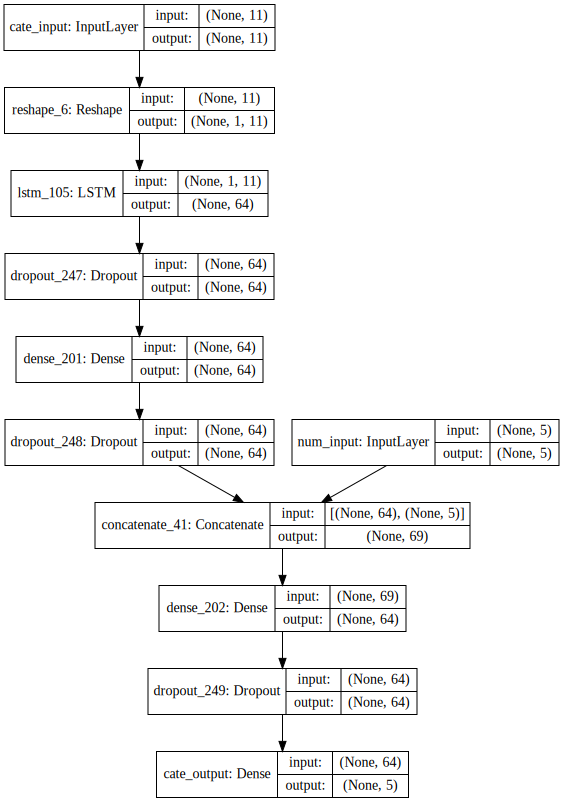

In [706]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [721]:
Xnew2 = np.array([x_train_cat[19]])

Xnew1 = np.array([x_train_num[19]])


# make a prediction
ynew = model.predict({'cate_input':Xnew2,'num_input':Xnew1})

# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew1[0],  ynew ))

X=[1 8 0 7 0], Predicted=[[0.86509156 7.7890024  0.33240092 6.5731373  0.        ]]


## 예전에 사용한 모델 데이터들

In [259]:
model = Model(inputs=[num_input, cat_input], outputs=[num_output, cat_output])

In [260]:
model.compile(optimizer='rmsprop',
              loss={'num_output':'mse', 'cat_output':'categorical_crossentropy'},
              metrics=['accuracy'])

In [261]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=3), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.


hist = model.fit({'num_input':x_train_num, 'cat_input':x_train_cat}, {'num_output': y_train_num, 'cat_output':x_train_cat}, epochs=50, batch_size=64, callbacks=callbacks, validation_split=0.1,)

Train on 22533 samples, validate on 2504 samples
Epoch 1/50
22533/22533 [==============================] - 1s 64us/step - loss: 399.6520 - num_output_loss: 0.2217 - cat_output_loss: 399.4303 - num_output_acc: 0.6617 - cat_output_acc: 0.9598 - val_loss: 380.0138 - val_num_output_loss: 0.0705 - val_cat_output_loss: 379.9433 - val_num_output_acc: 1.0000 - val_cat_output_acc: 0.9800


/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:1043: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,val_cat_output_acc,num_output_loss,cat_output_loss,val_loss,val_cat_output_loss,val_num_output_loss,lr,cat_output_acc,val_num_output_acc,num_output_acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/50
22533/22533 [==============================] - 1s 49us/step - loss: 347.3038 - num_output_loss: 0.0906 - cat_output_loss: 347.2132 - num_output_acc: 0.6040 - cat_output_acc: 0.9814 - val_loss: 341.4980 - val_num_output_loss: 0.1200 - val_cat_output_loss: 341.3780 - val_num_output_acc: 1.0000 - val_cat_output_acc: 0.9800
Epoch 3/50
22533/22533 [==============================] - 1s 52us/step - loss: 329.4858 - num_output_loss: 0.0844 - cat_output_loss: 329.4014 - num_output_acc: 0.7987 - cat_output_acc: 0.9824 - val_loss: 332.0796 - val_num_output_loss: 0.0784 - val_cat_output_loss: 332.0012 - val_num_output_acc: 0.2716 - val_cat_output_acc: 0.9856
Epoch 4/50
22533/22533 [==============================] - 1s 51us/step - loss: 315.3419 - num_output_loss: 0.0825 - cat_output_loss: 315.2594 - num_output_acc: 0.8714 - cat_output_acc: 0.9835 - val_loss: 312.8341 - val_num_output_loss: 0.3030 - val_cat_output_loss: 312.5311 - val_num_output_acc: 0.2716 - val_cat_output_acc: 0.9768
E

In [262]:
loss_and_metrics = model.evaluate({'num_input':x_train_num, 'cat_input':x_train_cat}, {'num_output': y_train_num, 'cat_output':x_train_cat}, batch_size=32)
print(loss_and_metrics)
print(loss_and_metrics[0])
print(loss_and_metrics[1] * 100)

25037/25037 [==============================] - 1s 39us/step
[307.81578775862897, 0.07099316146763511, 307.74479453636155, 1.0, 0.990094659903343]
307.81578775862897
7.099316146763511


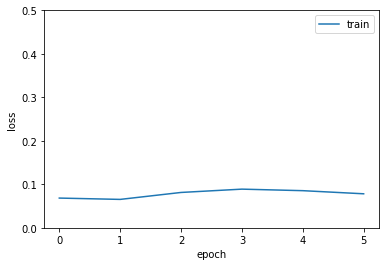

In [723]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 0.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()